### KNN-Klassifikation

K-Nearest-Neighbor-Algorithmus (KNN, zu Deutsch „k-nächste-Nachbarn-Algorithmus“) ist ein Klassifikationsverfahren, bei dem eine Klassenzuordnung unter Berücksichtigung seiner k nächsten Nachbarn vorgenommen wird. Der Teil des Lernens besteht aus simplem Abspeichern der Trainingsbeispiele, was auch als _lazy learning_ („träges Lernen“) bezeichnet wird. Eine Datennormalisierung kann die Genauigkeit dieses Algorithmus erhöhen.

Im folgenden Beispiel haben wir zwei Klassen von Objekten: A und B. Wir wollen herausfinden, zu welcher Klasse das Sternchen gehört.

<img src='https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png' width='300px;'>

### KNN Algorithmus

Dabei wird das Modell einfach die nächsten unmittelbaren Nachbarn des Sternchen beobachten. 
`k` ist die Anzahl der Datenpunkte in der unmittelbaren Nachbarschaft des Sternchens.
Nehmen wir `k=3` an, wird das Sternchen zu Klasse B zugeordnet, denn, aus 3 nächsten benachbarten Punkten, gehören 2 zur Klasse B. Also, weil die Mehrheit von drei Nachbarn Klasse B gehören, dann gehört auch der Stern sehr wohl dazu.  

Wenn wir die Nachbarschaft etwas erweitern, also `k=6`, dann sehen wir, dass unter 6 unmittelbaren benachbarten Datenpunkten 4 zur Klasse A und 2 zur Klasse B gehören. Also der Stern wird diesmal zur Klasse A zugeordnet.

### Kundenklassifiezierung mit KNN

Für diese Aufgabe haben wir einige Kunden-Informationen eines Telekommunikationsunternehmens in einer csv Datei gespeichert: `teleCust.csv` Das Ziel ist, einen Algorithmus, bzw. ein Modell zu finden, die die Datenverteilung (Zugehörigkeit von Kunden zu den jeweilgen Kategorien) anhand der Merkmale (Features) am besten beschreiben kann. Dazu werden wir den KNN-Algorithmus einsetzen.  

Als erster Schritt importieren wir notwendige Module und Pakete. Dann wird ein Dataframe erstellt:

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
print('Pakete erfolgreich importiert.')

Pakete erfolgreich importiert.


#### Daten laden und untersuchen
Ein Dataframe erstellen

In [83]:
df = pd.read_csv('teleCust.csv')

Allgemeine Informationen anzeigen lassen:

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [85]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Wie viele Exemplare hat jede Kategorie? (Spalte `custcat`) 

In [86]:
df.groupby('custcat').size()

custcat
1    266
2    217
3    281
4    236
dtype: int64

Welche Korrelationen bestehen zwischen den Attributen, zum Beispiel, welches Verhältnis gibt es zwischen Einkommen `income` und Kundenklasse `custcat`? 

In [87]:
income_by_custcat = df.groupby('custcat')['income'].mean()
print(income_by_custcat)

custcat
1    54.759398
2    74.834101
3    89.032028
4    92.000000
Name: income, dtype: float64


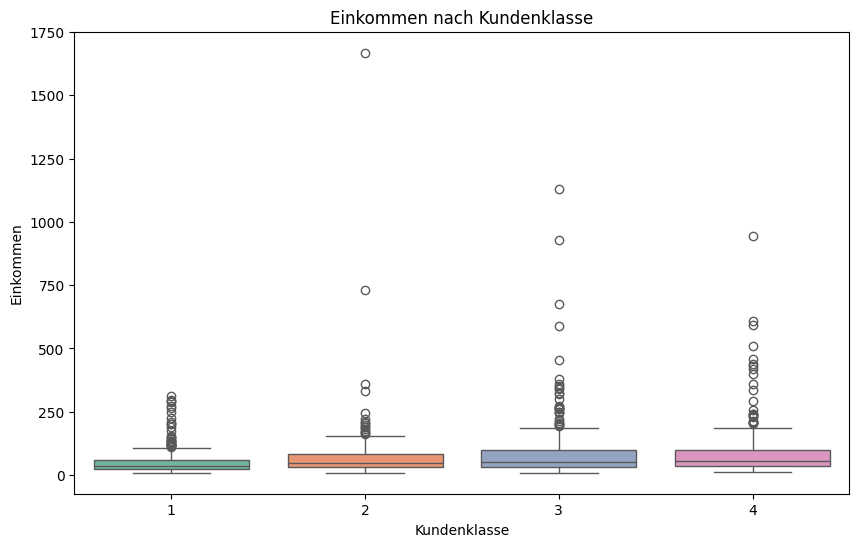

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='custcat', y='income', data=df, palette='Set2')

plt.title('Einkommen nach Kundenklasse')
plt.xlabel('Kundenklasse')
plt.ylabel('Einkommen')
plt.show()

#### Visualisierung
Gern kann hier ein Diagramm (wie z.B. ein Heatmap) für eine visuelle Darstellung der Korrelationen erstellt werden.

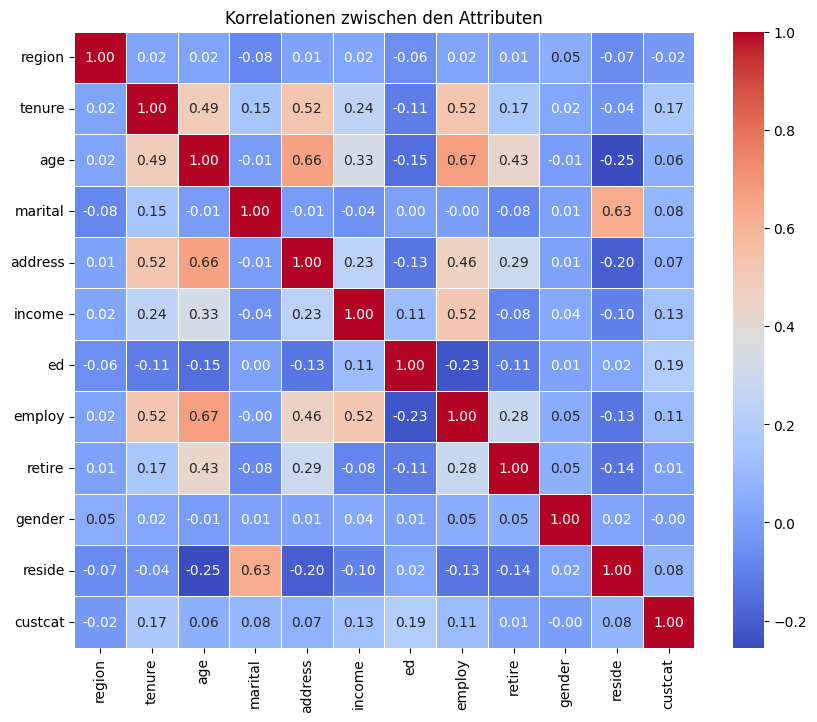

In [89]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korrelationen zwischen den Attributen')
plt.show()

#### Feature selection
Jetzt wollen wir die relevanten Merkmale (_features_) in einem zweidimensionalen Array `X` und das Zielmerkmal Kundenkategorie also `custcat` in einem eindimensionalen Array `y` speichern:

In [90]:
y = df['custcat']
X = df.drop(columns=['custcat'])

#### Daten Standardisieren
Wie bereits erklärt, eine Datennormalisierung kann die Genauigkeit dieses Algorithmus erhöhen. Wir können die Features (Array `X`) _standardisieren_, indem wir den Mittelwert entfernen und die Varianz auf Eins skalieren.

In [91]:
X = StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

#### Training- und Testing-Daten
Und dann die Daten in Train- und Test-Daten unterteilen. Dabei 80% der ganzen Daten als Training-Daten benutzen:

In [92]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

#### Modellierung
Demnächst erstellen wir ein Modell der Klasse `KNeighborsClassifier`. Dabei setzen wir zuerst die Anzahl der Nachbarschaften (`n_neighbors`) auf 4.

In [93]:
knn = KNeighborsClassifier(n_neighbors = 4)

Dann trainieren wir das Modell:

In [94]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Im nächsten Schritt ermitteln wir die Genauigkeit des Modells in Train- und Test-Set mit Hilfe der Funktion `accuracy_score`. Dazu muss natürlich vorher das Modell anhand `X_train` und `X_test` Einschätzungen machen.

In [95]:
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

test_acc = accuracy_score(y_test, y_pred_test)
train_acc = accuracy_score(y_train, y_pred_train)

print("Train-set Genauigkeit: ", train_acc)  
print("Test-set Genauigkeit: ", test_acc)

Train-set Genauigkeit:  0.54375
Test-set Genauigkeit:  0.325


Auch die Funktion `prediction_report` kann hier eingesetzt werden, um die Performance des Modells noch näher zu unersuchen:

In [96]:
print("\nClassification Report (Test-Set):")
print(classification_report(y_test, y_pred_test))

print("\nClassification Report (Train-Set):")
print(classification_report(y_train, y_pred_train))


Classification Report (Test-Set):
              precision    recall  f1-score   support

           1       0.37      0.48      0.42        60
           2       0.15      0.13      0.14        39
           3       0.32      0.31      0.31        55
           4       0.40      0.30      0.35        46

    accuracy                           0.33       200
   macro avg       0.31      0.31      0.30       200
weighted avg       0.32      0.33      0.32       200


Classification Report (Train-Set):
              precision    recall  f1-score   support

           1       0.50      0.72      0.59       206
           2       0.54      0.55      0.55       178
           3       0.64      0.54      0.59       226
           4       0.51      0.34      0.41       190

    accuracy                           0.54       800
   macro avg       0.55      0.54      0.53       800
weighted avg       0.55      0.54      0.54       800



Wir können versuchen, die Performance unseres Modells zu verbessern. Dazu können wir die Anzahl der Nachbarschaften (`n_neighbors`) erhöhen und das Ergebnis mit dem Letzteren vergleichen. Wir versuchen jetzt mit 6 Nachbarschaften:

In [97]:
knn_6 = KNeighborsClassifier(n_neighbors = 6)
knn_6.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [98]:
y_pred_test_6 = knn_6.predict(X_test)
y_pred_train_6 = knn_6.predict(X_train)

test_acc_6 = accuracy_score(y_test, y_pred_test_6)
train_acc_6 = accuracy_score(y_train, y_pred_train_6)

print("Train-set Genauigkeit: ", train_acc_6)  
print("Test-set Genauigkeit: ", test_acc_6)

Train-set Genauigkeit:  0.5075
Test-set Genauigkeit:  0.33


`n_neighbors` ist die Anzahl der Nachbarschaften. Aber wie können wir die _optimale_ Zahl finden?
Dazu können wir mit verschiedenen Werten, zum Beispiel 1, 2, .. 10 Modelle trainieren und testen und ihre Genauigkeiten dann vergleichen und das Modell mit dem höchsten Genauigkeitswert finden.

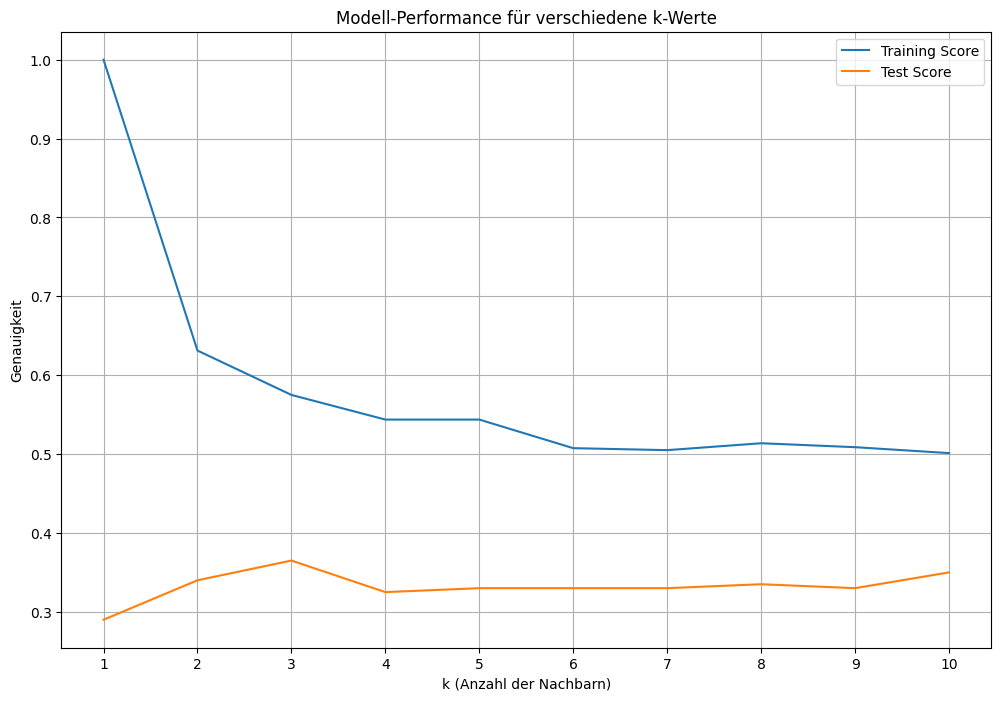

In [99]:
k_range = range(1, 11)
train_scores = []
test_scores = []
 
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
 
plt.figure(figsize=(12, 8))
plt.plot(k_range, train_scores, label='Training Score')
plt.plot(k_range, test_scores, label='Test Score')
plt.xlabel('k (Anzahl der Nachbarn)')
plt.ylabel('Genauigkeit')
plt.title('Modell-Performance für verschiedene k-Werte')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show();

Die beste Genauigkeit ermitteln:

In [100]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)
y_pred_train_1 = knn_1.predict(X_train)
train_acc_1 = accuracy_score(y_train, y_pred_train_1)
print("Die beste Train-set Genauigkeit mit k=1: ", train_acc_1)  

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred_test_3 = knn_3.predict(X_test)
test_acc_3 = accuracy_score(y_test, y_pred_test_3)
print("Die beste Test-set Genauigkeit mit k=3: ", test_acc_3)

Die beste Train-set Genauigkeit mit k=1:  1.0
Die beste Test-set Genauigkeit mit k=3:  0.365


Welche weitere Klassifikationsmodelle kämen hier in Frage?

In [101]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=5, random_state=42)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_pred))
# model1.score(X_test, y_test)

DecisionTrees's Accuracy:  0.34


In [102]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print("RandomForest's Accuracy: ", accuracy_score(y_test, y_pred))
# model2.score(X_test, y_test)

RandomForest's Accuracy:  0.36


In [ ]:
! pip install xgboost

In [104]:
from xgboost import XGBClassifier

y_train_encoded = y_train - 1
y_test_encoded = y_test - 1

model3 = XGBClassifier()
model3.fit(X_train, y_train_encoded)

y_pred_encoded = model3.predict(X_test)
y_pred = y_pred_encoded + 1
print("XGB's Accuracy: ", accuracy_score(y_test, y_pred))

XGB's Accuracy:  0.295


In [105]:
from sklearn.svm import SVC
model4 = SVC(kernel='rbf', C=1, gamma='scale')
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
print("SVC's Accuracy: ", accuracy_score(y_test, y_pred))
# model4.score(X_test, y_test)

SVC's Accuracy:  0.39


In [106]:
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(X_train, y_train)
y_pred = model6.predict(X_test)
print("GaussianNB's Accuracy: ", accuracy_score(y_test, y_pred))

GaussianNB's Accuracy:  0.35
